# Logistic Regression

En éste notebook vamos a ver la implementación en NumPy del modelo de regresión logística mediante gradient descent, usando los resultados obtenidos de la teoría. Por último, se computarán las métricas para medir el rendimiento del modelo.

## Cargamos las Librerías

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
import sys  
#sys.path.insert(0, '../../clase_3/ejercicios/src')

## Cargamos el Dataset

In [3]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def _build_dataset(self, path):
        structure = [('x_1', float),
                     ('x_2', float),
                     ('y', float)]

        with open(path, encoding="utf8") as data_csv:
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]), float(line.split(',')[2]))
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings

    def split(self, percentage):
        X = np.array([self.dataset['x_1'], self.dataset['x_2']]).T
        y = self.dataset['y']

        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test

In [4]:
dataset = Data('data/dataset.txt')
X_train, X_test, y_train, y_test = dataset.split(0.8)

print('Formato del dataset: {}'.format(X_train.shape))

Formato del dataset: (79, 2)


In [5]:
X_test.shape

(20, 2)

In [6]:
print(X_test[:10, :])

[[76.0987867  87.42056972]
 [79.94481794 74.16311935]
 [58.84095622 75.85844831]
 [50.28649612 49.80453881]
 [66.56089447 41.09209808]
 [62.0730638  96.76882412]
 [50.53478829 48.85581153]
 [83.90239366 56.30804622]
 [64.03932042 78.03168802]
 [88.91389642 69.8037889 ]]


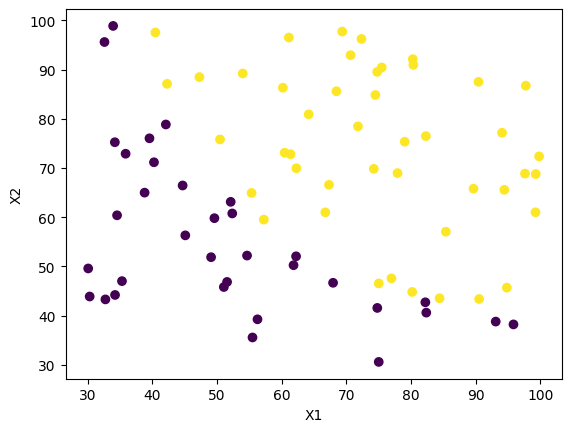

In [7]:
# Observamos los datos
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
# escalamos los datos de entrada.Es importante para evitar poblemas numéricos como overflow.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train[:5, :]

array([[ 1.23588027, -0.01713083],
       [ 1.27875725, -1.22547316],
       [-0.85452069,  1.2056485 ],
       [-0.49123154, -0.74969736],
       [ 1.27391905,  1.15350125]])

In [10]:
X_test[:5, :]

array([[ 0.56665689,  1.14874407],
       [ 0.75621766,  0.43386581],
       [-0.28393621,  0.52528262],
       [-0.70556306, -0.87961599],
       [ 0.09655925, -1.34941481]])

## Regresión Logística

## Implementación de Building Blocks del Modelo

A continuación, se deberán implementar paso a paso los distintos bloques de código que conforman el modelo, junto con algunas funciones auxiliares.

### Función Sigmoid

Implementar la función: $g(z) = \frac{1}{1 + e^{-z}}$ en NumPy

In [11]:
# TODO

### Binary Cross Entropy

Implementar la función de costo: $J(w) = \frac{1}{n}\sum_{i=1}^{n}L\left ( \hat{y},y \right )= \frac{1}{n}\sum_{i=1}^{n}\left [y^{(i)}log(\hat{y}^{(i)})+ (1-y^{(i)})log(1-\hat{y}^{(i)}) \right ]$

In [12]:
# TODO

### Gradiente

Implementar el gradiente de la función costo respecto de los parámetros: $\frac{\partial J(w)}{\partial w} = \frac{1}{n}\sum_{i=1}^{n}\left ( \hat{y}^{i}-y^{i}\right )\bar{x}^i$

In [13]:
# prediccion

# error

# suma de gradiente

# promedio

# transponer (depende de su implementación)

# ¿todo junto?



### Implementar función fit

Utilizas los bloques anteriores, junto con la implementación en NumPy del algoritmo Mini-Batch gradient descent, para crear la función fit de nuestro modelo de regresión logística. Cada un determinado número de epochs calculen el loss, almacénenlo en una lista y hagan un log de los valores. La función debe devolver los parámetros ajustados.

In [14]:
# TODO
# def fit(self, X, y, lr, b, epochs, bias=True):
def fit(self, X, y, lr, b, epochs, bias=True, log=100, verbose=True):
    # si decidimos utilizar bias, agregamos como siempre una columna con '1' al dataset de entrada
    if bias:
        X = np.hstack((np.ones((X.shape[0], 1)), X))

    # inicializamos aleatoriamente los pesos

    
    loss_list = []

    # corremos Mini-Batch para optimizar los parámetros
    for j in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X_train = X[idx]
        y_train = y[idx]
        batch_size = int(len(X_train) / b)

        for i in range(0, len(X_train), batch_size):
            # Seleccionar los elementos del batch actual
            end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
            batch_X = X_train[i: end]
            batch_y = y_train[i: end]

            # cálculo de predicciones
            prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
            # cálculo del error
            error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
            # cálculo del grandiente
            grad_sum = np.sum(error * batch_X, axis=0)
            grad_mul = 1 / batch_size * grad_sum
            gradient = np.transpose(grad_mul).reshape(-1, 1)
            #actualizar pesos
            W = W - (lr * gradient)
    self.model = W
    return NotImplemented

## Implementación completa

In [15]:
class LogisticRegression():
    
    # definimos la función sigmoid para entrenamiento y las predicciones
    def sigmoid(self,x):
            return 1 / (1 + np.exp(-x))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss 

    def fit(self, X, y, lr, b, epochs, bias=True, log=100, verbose=True):

        # si decidimos utilizar bias, agregamos como siempre una columna con '1' al dataset de entrada
        if bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        # inicializamos aleatoriamente los pesos
        m = X.shape[1]
        W = np.random.randn(m).reshape(m, 1)

        loss_list = []
        
        # corremos Mini-Batch para optimizar los parámetros
        for j in range(epochs):
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]
            batch_size = int(len(X_train) / b)

            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]
                batch_y = y_train[i: end]

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)
            
            l_epoch = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            loss_list.append(l_epoch)
            if verbose:
                if j%log==0:
                    print("Epoch: {}, Loss: {}".format(j, l_epoch))
                
        self.model = W
        self.losses = loss_list

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        p = self.sigmoid(X @ self.model)
        mask_true = p >= 0.5
        mask_false = p < 0.5
        p[mask_true] = 1
        p[mask_false] = 0
        return p

In [16]:
# Seleccionar hiperparámetros
lr = 0.01
b = 16
epochs = 1000
bias = True

# Hacer el fit del modelo con los HPs seleccionados
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train.reshape(-1, 1), lr, b, epochs, bias, log=5)
print(logistic_regression.model)
predictions = logistic_regression.predict(X_test)

Epoch: 0, Loss: 0.9245674686323495
Epoch: 5, Loss: 0.7331250295375523
Epoch: 10, Loss: 0.6016252760605018
Epoch: 15, Loss: 0.5151929978417684
Epoch: 20, Loss: 0.4580183918722408
Epoch: 25, Loss: 0.41892995059649357
Epoch: 30, Loss: 0.39089617537938515
Epoch: 35, Loss: 0.37001186045650947
Epoch: 40, Loss: 0.3538670185521188
Epoch: 45, Loss: 0.3409985860437206
Epoch: 50, Loss: 0.330490444905576
Epoch: 55, Loss: 0.32173507699771486
Epoch: 60, Loss: 0.31430415255128796
Epoch: 65, Loss: 0.30791231920580453
Epoch: 70, Loss: 0.3023320079102485
Epoch: 75, Loss: 0.29742562731609584
Epoch: 80, Loss: 0.29306389922774834
Epoch: 85, Loss: 0.2891573735731851
Epoch: 90, Loss: 0.28563704443704585
Epoch: 95, Loss: 0.2824440098288207
Epoch: 100, Loss: 0.2795328359675864
Epoch: 105, Loss: 0.27686814636568247
Epoch: 110, Loss: 0.27441703410628815
Epoch: 115, Loss: 0.27215424596960786
Epoch: 120, Loss: 0.2700584096644732
Epoch: 125, Loss: 0.26811147434289245
Epoch: 130, Loss: 0.26629782903372684
Epoch: 135

### Decision Boundary

En los casos donde tengamos dos o tres features en el dataset, podemos graficar la línea de decisión (plano para 3 features) que aplica el modelo para clasificar las muestras bajo una u otra clase. La derivación surge de la fórmula lineal que se utiliza en la sigmoid:

$\hat{y}\geq 0.5 \to 1$ 

$\hat{y}<0.5 \to 0$

Teniendo en cuenta la función sigmoid:

$\hat{y}\geq 0.5 \Leftrightarrow w^{T}x + b \geq 0$

Por lo que la decision boundary es:

$w^{T}x + b \geq 0$


Igualando a la ecuación de una recta en 2D, donde la abcisa es $X_1$ y la ordenada $X_2$:

$w_1x_1 + w_2x_2 + w_0 = mx_1 + c$

$w_1x_1 + w_2x_2 + w_0 = 0 $

$w_1x_1 + w_2mx_1+w_2c + w_0 = 0$

$x_1 = 0 \to w_2c + w_0 = 0$ 

$c = -w_0/w_2$

Reemplazando $c$:

$w_1x_1 + w_2mx_1 = 0$

$w_1x_1 = -w_2mx_1$

$m = -w_1/w_2$

In [17]:
# Calculamos el slope e intercept para graficar
slope = -(logistic_regression.model[1] / logistic_regression.model[2])
intercept = -(logistic_regression.model[0] / logistic_regression.model[2])

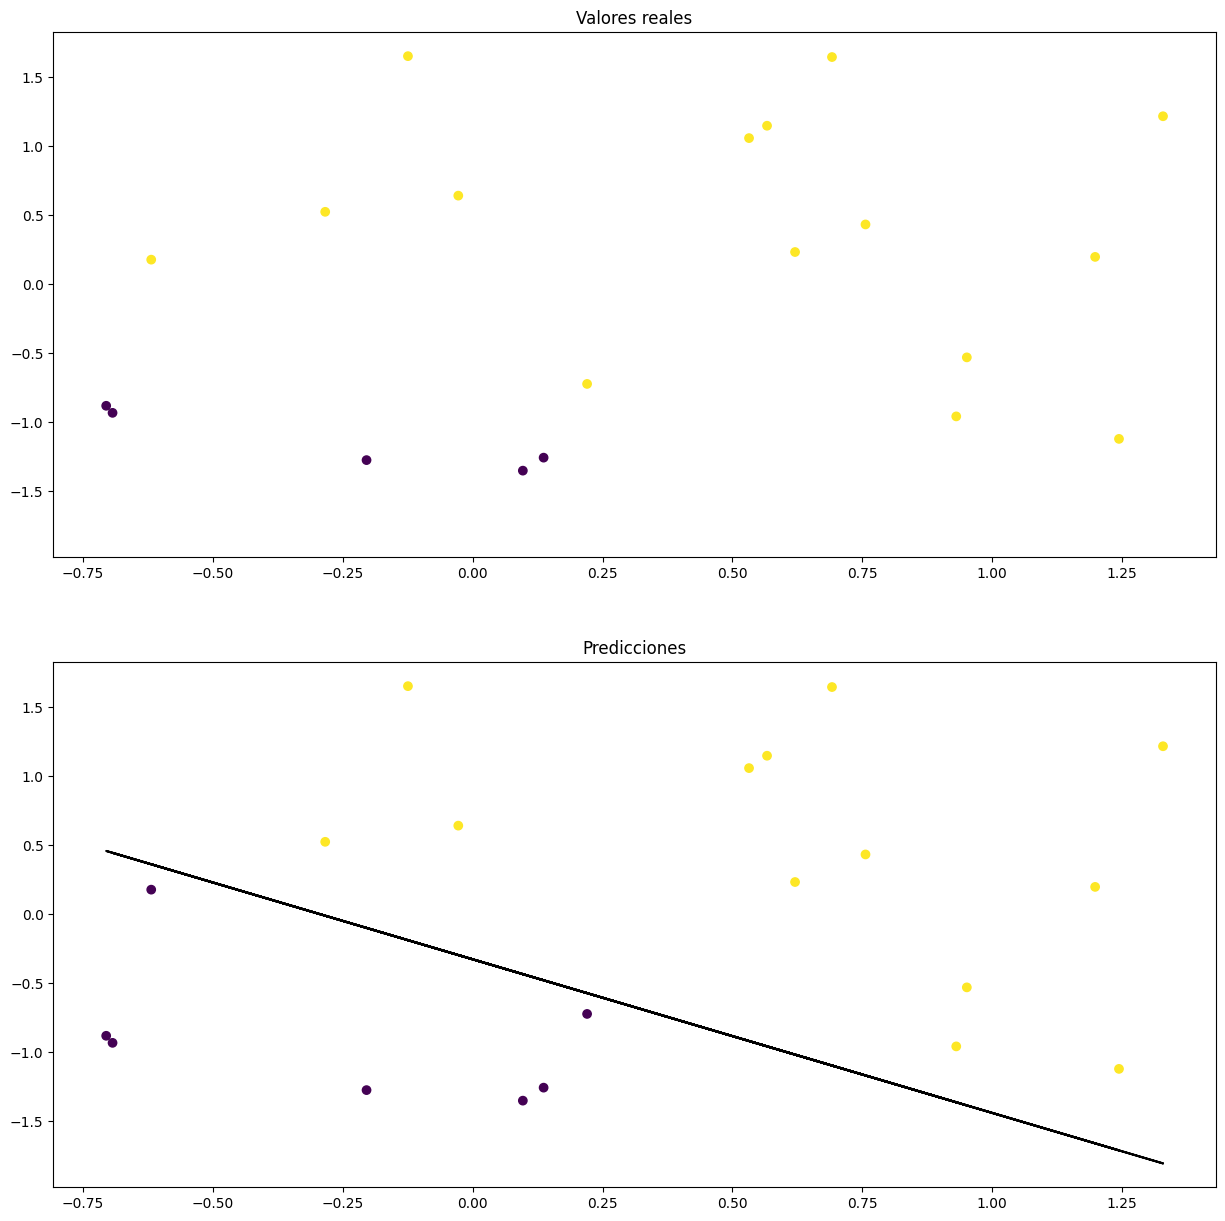

In [18]:
# Graficos
f, (ax, bx) = plt.subplots(2, 1, sharey='col', figsize=(15, 15))

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax.set_title('Valores reales')

bx.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0])
y_vals = intercept + (slope * X_test[:, 0])
bx.plot(X_test[:, 0], y_vals, c="k")
bx.set_title('Predicciones')

plt.show()

### Calculamos las métricas

In [19]:
predictions.shape

(20, 1)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
metrics = [accuracy_score, precision_score, recall_score]
results = {}
for metric in metrics:
    name = metric.__class__.__name__
    results[name] = metric(y_test, predictions[:, 0])
    print('{metric}: {value}'.format(metric=name, value=results[name]))

function: 0.9
function: 1.0
function: 0.8666666666666667


### K-folds para selección de hiperparámetros

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
def k_folds(X_train, y_train, lr, b, epochs, bias=True, k=5, verbose=False):
    
    # Definimos el modelo a emplear
    l_regression = LogisticRegression()

    # Definimos una métrica

    chunk_size = int(len(X_train) / k)
    acc_list = []

    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression.fit(new_X_train, new_y_train, lr, b, epochs, bias, verbose=verbose)
        prediction = l_regression.predict(new_X_valid)
        k_error = accuracy_score(new_y_valid, prediction)
        acc_list.append(k_error)
        # print("Modelo {i} de {k}, Métrica: {error}".format(i=i/chunk_size, k=k, error=k_error))
        
    mean_acc = np.mean(acc_list)

    return mean_acc

In [24]:
# K-Folds para determinación del learning rate

lr_list = np.linspace(0.001, 0.01, 10)
kfolds_lr = np.zeros(lr_list.shape)

for i, lr in enumerate(lr_list):
    kfolds_lr[i] = k_folds(X_train, y_train.reshape(-1, 1), lr, 16, 1000)

best_lr = lr_list[np.argmax(kfolds_lr)]

In [25]:
best_lr

0.001

In [26]:
colname = ['learning_rate', 'kfolds_mean']
lr_df = pd.DataFrame(np.column_stack([lr_list, kfolds_lr]),columns=colname)

In [27]:
lr_df.head(2)

,learning_rate,kfolds_mean
0,0.001,0.858333
1,0.002,0.858333


In [28]:
lr_df.describe()

,learning_rate,kfolds_mean
count,10.000000,10.000000
mean,0.005500,0.858333
std,0.003028,0.000000
min,0.001000,0.858333
25%,0.003250,0.858333
50%,0.005500,0.858333
75%,0.007750,0.858333
max,0.010000,0.858333


In [29]:
# K-Folds para determinación del batch
batch_list = np.linspace(1, 30, 30)
kfolds_b = np.zeros(batch_list.shape)

for i, b in enumerate(batch_list):
    kfolds_b[i] = k_folds(X_train, y_train.reshape(-1, 1), best_lr, b, 1000)

best_b = batch_list[np.argmax(kfolds_b)]

In [30]:
best_b

5.0

In [31]:
colname = ['batch', 'kfolds_mean']
batch_df = pd.DataFrame(np.column_stack([batch_list, kfolds_b]),columns=colname)

In [32]:
batch_df.head(20)

,batch,kfolds_mean
0,1.0,0.580556
1,2.0,0.625000
2,3.0,0.713889
3,4.0,0.802778
4,5.0,0.877778
5,6.0,0.825000
6,7.0,0.802778
7,8.0,0.825000
8,9.0,0.858333
9,10.0,0.847222


In [33]:
batch_df.describe()

,batch,kfolds_mean
count,30.000000,30.000000
mean,15.500000,0.829722
std,8.803408,0.068839
min,1.000000,0.580556
25%,8.250000,0.847222
50%,15.500000,0.858333
75%,22.750000,0.858333
max,30.000000,0.877778
